## Az adatok beolvasása



In [ ]:
import pandas as pd
!wget -O titanic.csv https://www.dropbox.com/s/9e4rvnrdc9reelk/titanic.csv?dl=0
df_titanic = pd.read_csv('titanic.csv')

--2020-11-03 06:32:09--  https://www.dropbox.com/s/9e4rvnrdc9reelk/titanic.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9e4rvnrdc9reelk/titanic.csv [following]
--2020-11-03 06:32:09--  https://www.dropbox.com/s/raw/9e4rvnrdc9reelk/titanic.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf038a589f592c568a4d6b8c14e.dl.dropboxusercontent.com/cd/0/inline/BCdkqsa3xmCda-MVFW8PlrORNvtKXmXzIbvzglRZ5qVqHo5iSV857vtlq5VKpdGlyhr-bz5wWP10Fk408zr2vMImJC7j_c4OoDe2oP_NIeEcpiIOzVg5sgViJFtDvzPbWV8/file# [following]
--2020-11-03 06:32:10--  https://ucf038a589f592c568a4d6b8c14e.dl.dropboxusercontent.com/cd/0/inline/BCdkqsa3xmCda-MVFW8PlrORNvtKXmXzIbvzglRZ5qVqHo5iSV857vtlq5VKpdGlyhr-bz5wWP10Fk408zr2vMImJC7j_c4OoDe2oP_NIeEcpiIO

### Az adatok megtekintése

In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Szöveges változók mappelése

Itt a nemek (sex) változót female-ről és male-ről 0-ra és 1-re konvertáltuk.

In [ ]:
sexes = {"female": 0, "male": 1}
df_titanic['Sex'] = df_titanic['Sex'].map(sexes)

In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### Hiányzó adatok vizsgálata

In [ ]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### A név adatból több információ kinyerése (rangok).

In [ ]:
df_titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [ ]:
df_titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Mme           1
Sir           1
Countess      1
Jonkheer      1
Capt          1
Lady          1
Ms            1
Name: Name, dtype: int64

In [ ]:
df_titanic['Title'] = df_titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
titles = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }


In [ ]:
df_titanic['Title'] = df_titanic['Title'].map(titles)

In [ ]:
#df_titanic.drop('Name', axis=1, inplace=True)

In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0


### Hiányzó adatok kitöltése
Age (kor) változó 177 hiányzó adatának kitöltése a medián értékkel.

In [ ]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

Itt kitöröltük a Kor változó pótlását a mediánnal.

In [ ]:
#df_titanic["Age"].fillna(df_titanic.transform("median"), inplace=True)

### Kikötő hiányzó adatok kitöltése
Kitöltés a leggyakoribbi elemmel.

In [ ]:
df_titanic['Embarked'] = df_titanic['Embarked'].fillna('S')

In [ ]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
df_titanic['Embarked'] = df_titanic['Embarked'].map(embarked_mapping)

In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0


In [ ]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

### Kabin változó törlése
Mivel sok adat hiányzik.

In [ ]:
df_titanic["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
D              3
              ..
E10            1
B102           1
B86            1
D56            1
A5             1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df_titanic.drop('Cabin', axis=1, inplace=True)

In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0


## Jegy változó törlése

In [ ]:
df_titanic.drop('Ticket', axis=1, inplace=True)

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
 10  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 76.7+ KB


# Regresszió
## Az Age (Kor) változó regressziója, becslése a hiányzó adatoknak


Szedjük szét teszt halmazra és train halmazra. Ahol az Age változó nem nulla (notnull), az lesz a train, ahol nulla (isnull), az lesz a teszt.

In [ ]:
df_train = df_titanic.loc[df_titanic['Age'].notnull(), ['Pclass', 'Sex','SibSp', 'Parch', 'Fare', 'Embarked', 'Title' ]]
df_train_with_survived = df_titanic.loc[df_titanic['Age'].notnull(), ['Pclass', 'Sex','SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Survived' ]]
df_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
0,3,1,1,0,7.2500,0,0
1,1,0,1,0,71.2833,1,2
2,3,0,0,0,7.9250,0,1
3,1,0,1,0,53.1000,0,2
4,3,1,0,0,8.0500,0,0


In [ ]:
X_train = df_titanic.loc[df_titanic['Age'].notnull(), ['Pclass', 'Sex','SibSp', 'Parch', 'Fare', 'Embarked', 'Title' ]]
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
0,3,1,1,0,7.2500,0,0
1,1,0,1,0,71.2833,1,2
2,3,0,0,0,7.9250,0,1
3,1,0,1,0,53.1000,0,2
4,3,1,0,0,8.0500,0,0


In [ ]:
df_y = df_titanic.loc[df_titanic['Age'].notnull(), ['Age' ]]
y_train  = df_y['Age']
y_train.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [ ]:
df_test = df_titanic.loc[df_titanic['Age'].isnull(), ['Pclass','Sex','SibSp', 'Parch', 'Fare', 'Embarked', 'Title' ]]
df_test_with_survived = df_titanic.loc[df_titanic['Age'].isnull(), ['Pclass','Sex','SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Survived' ]]
df_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
5,3,1,0,0,8.4583,2,0
17,2,1,0,0,13.0000,0,0
19,3,0,0,0,7.2250,1,2
26,3,1,0,0,7.2250,1,0
28,3,0,0,0,7.8792,2,1


In [ ]:
X_test = df_titanic.loc[df_titanic['Age'].isnull(), ['Pclass','Sex','SibSp', 'Parch', 'Fare', 'Embarked', 'Title' ]]
X_test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
5,3,1,0,0,8.4583,2,0
17,2,1,0,0,13.0000,0,0
19,3,0,0,0,7.2250,1,2
26,3,1,0,0,7.2250,1,0
28,3,0,0,0,7.8792,2,1


### Normalizáljuk, skálázzuk az adatot

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train = scaler.transform(df_train)
X_test = scaler.transform(df_test)

In [ ]:
y_train

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

### Szedjük szét trainre és validation adatra - cross validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)



## SVR regresszió

In [ ]:
from sklearn.svm import SVR
clf=SVR()
score = cross_val_score(clf, X_train, y_train, cv=k_fold)
print(score)


[ 0.02068639 -0.12020615  0.0876742   0.07111624  0.04484929  0.03573036
  0.06257626 -0.11790697  0.03125683 -0.0058097 ]


## RandomForest regresszió

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor(n_estimators=13,criterion='mse')
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1)
print(score)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

[0.35687151 0.11525779 0.22294654 0.25087243 0.35231643 0.31262256
 0.45391042 0.15092738 0.15290096 0.39817743]


Töltsük fel az Age változót a most kapott eredményekkel.

In [ ]:
df_test_with_survived['Age']=y_hat

In [ ]:
df_train_with_survived['Age']=df_y

In [ ]:
frames = [df_train_with_survived, df_test_with_survived]
df_titanic_with_age = pd.concat(frames)


In [ ]:
df_titanic_with_age.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Survived,Age
0,3,1,1,0,7.2500,0,0,0,22.0
1,1,0,1,0,71.2833,1,2,1,38.0
2,3,0,0,0,7.9250,0,1,1,26.0
3,1,0,1,0,53.1000,0,2,1,35.0
4,3,1,0,0,8.0500,0,0,0,35.0


## Ezután lehet is folytatni az osztályozást.

In [ ]:
y  = df_titanic_with_age['Survived']
X = df_titanic_with_age.drop('Survived', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)



## KNN osztályozó

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
# odd number, sqrt(n)
clf = KNeighborsClassifier(n_neighbors = 23)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.72222222 0.76056338 0.83098592 0.8028169  0.77464789
 0.8028169  0.74647887 0.87323944 0.87323944]


In [ ]:
round(np.mean(score)*100, 2)

80.2

## Decision tree osztályozó

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76388889 0.65277778 0.71830986 0.81690141 0.77464789 0.8028169
 0.78873239 0.74647887 0.8028169  0.87323944]


In [ ]:
round(np.mean(score)*100, 2)

77.41

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=23)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.79166667 0.72222222 0.76056338 0.8028169  0.84507042 0.78873239
 0.81690141 0.83098592 0.88732394 0.85915493]


In [ ]:
round(np.mean(score)*100, 2)

81.05

### Naiv Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.80555556 0.70833333 0.76056338 0.81690141 0.78873239 0.8028169
 0.83098592 0.74647887 0.85915493 0.84507042]


In [ ]:
round(np.mean(score)*100, 2)

79.65

## SVM

### SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.values, y_hat)

array([[102,  10],
       [ 20,  47]])

In [ ]:
y_hat

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1])

In [ ]:
y_test.values

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1])

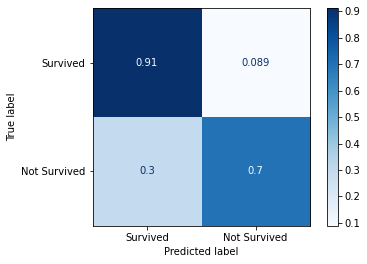

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
#plot_confusion_matrix(clf, X_test, y_hat, normalize='true')
class_names = ["Survived", "Not Survived"]
plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize="true")

### Bayes

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
confusion_matrix(y_test.values, y_hat)

array([[96, 16],
       [17, 50]])

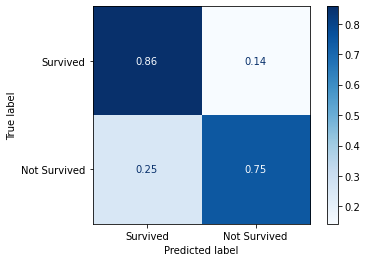

In [ ]:
class_names = ["Survived", "Not Survived"]
plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize="true")

## Adatok lementése CSV formátumban

In [ ]:
#cleaned_data.to_csv('titanic.clean.csv', index=False)